# SIR Model with a Constant Force of Infection

In the last 2 etivities, you have learnt how you can represent differential equations in R through the use of the deSolve package. In this etivity you will use this skill to start coding a simplified SIR model within R. Let's recap first what an SIR model is: 

<img src="Graphics_and_Data/m1_nb3_model_diagram.png">

The differential equations for this system are:

\begin{align}
\frac{dS}{dt} & = -\lambda S \\
\frac{dI}{dt} & = \lambda S - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

We can use the SIR model to describe a disease that can be split into 3 states: susceptible ($S$), infected ($I$), or recovered (R). All those infected are infectious, and all those recovered are immune, so they cannot get the disease again.

One part of this model should already be very familiar to you! The transition from I to R is what we explored in etivity 1. The new addition is the susceptibles in compartment S. As you learnt in the lecture, depending on how many people in the population are infectious, susceptible people experience a force of infection $\lambda$ (*lambda*), which is the transition rate at which they become infected.

In this etivity, we are trying to simulate an outbreak of a new infectious disease that our population of 10$^{6}$ people has not been exposed to before. This means that we are starting with a single case, everyone else is susceptible to the disease, and no one is yet immune or recovered. This can for example reflect a situation where an infected person introduces a new disease into a geographically isolated population, like on an island, or even when an infections "spill over" from other animals into a human population. In terms of the initial conditions for our model, we can define: S = 10$^{6}$-1 = 999999, I = 1 and R = 0. 

Now it's your turn to write and solve this model in R, assuming a constant force of infection of 0.2 days$^{-1}$. Like in the first coding etivity, the infection has an average duration of 10 days, but this time we want to run the model for 60 days. Try to write the whole code by yourself - but if you have trouble remembering how, just go back to the etivity 1 solution to check. We have also added some hints in the cell below, to help you remember which different parts are required. As you go along, it is good practice to add your own comments to every part, explaining what the code is for. When you're done writing the code and the comments, run it and print the output to double-check that everything works.

In [5]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

initial_state_values <- c(S = 1e6 - 1, 
                          I = 1,
                          R = 0)
parameters <- c(lambda = 0.2, gamma = 0.1) 

# TIMESTEPS:

times <- seq(from = 0, to = 60, by = 1) 

# SIR MODEL FUNCTION 
# We are renaming this to sir_model. 
# Remember to include the input arguments, 
# differential equations and output objects here.

sir_model  <- function(time, state, parameters) { 
  
    with(as.list(c(state, parameters)), {
      
        dS <- -lambda * S
        dI <- lambda * S - gamma * I
        dR <- gamma * I
      
      return(list(c(dS, dI, dR)))
    })
  
}

# MODEL OUTPUT (solving the differential equations):

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

In the following cell, plot the number of people in each compartment over time. You should see that at the peak of the epidemic, around 500000 people are infected.

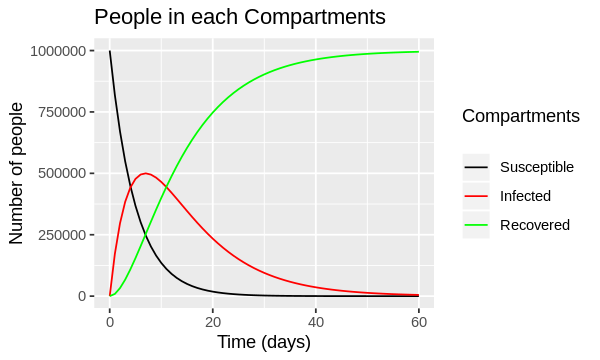

In [7]:
# Plot:

output_long <- melt(as.data.frame(output), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Number of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

### Question: based on the plot, describe the pattern of the epidemic over the 2 month period. How does the number of people in the susceptible, infected and recovered compartments change over time? After how many days does the epidemic reach its peak? When does it end?

The number of infected people increass rapidly for seven days. Then it slowly decreases to zero. The infected peak as said earlier, is 500000. The recovered people is increasing all the time, from zero to 100 thousands.

In this etivity you have coded your first simple SIR model - good job! This is what we will be building on as the models get more complex over the course of the specialisations. The nice thing is that the general structure of the R code stays the same no matter how complex the model gets, so you can keep reusing and modifying the code you developed here! We suggest you start a file, perhaps called "my_model_code.R" which you can copy-paste your code into **after double-checking it is correct with the solution file**. You can then always go back to it and copy-paste it into the next etivity files to adapt.